## The purpose of this project is to analysis the diabetes dataset in terms of statistical, data visualization, feature selection and diabetes classification (binary).
The dataset is downloaded from the UCI Machine Learning respository. It describes the patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

In [1]:
import pandas as pd
import model as md
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Import data
Dataset source: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

Dataset deails: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names

In [2]:
df = pd.read_csv('pima-indians-diabetes.data.csv', header=None)

X_df = df.iloc[:,0:8]

y_df = df.iloc[:,8]

X = X_df.to_numpy()
X = StandardScaler().fit_transform(X)
y = y_df.to_numpy()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
print('Patients with onset diabetes: {}'.format(y_df[y_df==1].count()))
print('Paitents without diabetes: {}'.format(y_df[y_df==0].count()))      

Patients with onset diabetes: 268
Paitents without diabetes: 500


## Statistical analysis

In [5]:
from scipy.stats import ttest_ind

In [6]:
for i in range(X_df.shape[1]):
    m0=df[y_df==0].iloc[:, i].mean()
    m1=df[y_df==1].iloc[:, i].mean()
    print('mean value for col {} is {:.4f}, {:.4f}'.format(i,m0,m1))
    t,p=ttest_ind(df[y_df==0].iloc[:, i], df[y_df==1].iloc[:, i])
    print('p-value for col {} is {:.4f}'.format(i,p))

mean value for col 0 is 3.2980, 4.8657
p-value for col 0 is 0.0000
mean value for col 1 is 109.9800, 141.2575
p-value for col 1 is 0.0000
mean value for col 2 is 68.1840, 70.8246
p-value for col 2 is 0.0715
mean value for col 3 is 19.6640, 22.1642
p-value for col 3 is 0.0383
mean value for col 4 is 68.7920, 100.3358
p-value for col 4 is 0.0003
mean value for col 5 is 30.3042, 35.1425
p-value for col 5 is 0.0000
mean value for col 6 is 0.4297, 0.5505
p-value for col 6 is 0.0000
mean value for col 7 is 31.1900, 37.0672
p-value for col 7 is 0.0000


In [7]:
df.corr(method='pearson')

,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
corr = np.array(df.corr(method='pearson'))
print('The correlation coefficient between the features and class index: \n{}'.format(corr[0:-1,-1]))

The correlation coefficient between the features and class index: 
[0.22189815 0.4665814  0.06506836 0.07475223 0.13054795 0.29269466
 0.17384407 0.23835598]


## PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [11]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
targetDf = pd.DataFrame(data = y
             , columns = ['target'])
finalDf = pd.concat([principalDf, targetDf], axis = 1)

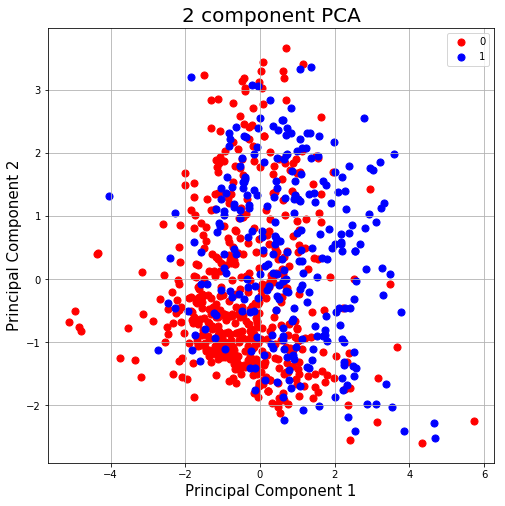

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## t-SNE

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_components = tsne_model.fit_transform(X)

In [15]:
tsne_df = pd.DataFrame(data=tsne_components, columns=['tsne_1', 'tsne_2'])
target_df = pd.DataFrame(data=y, columns=['target'])
tsne_df = pd.concat([tsne_df,target_df], axis=1)

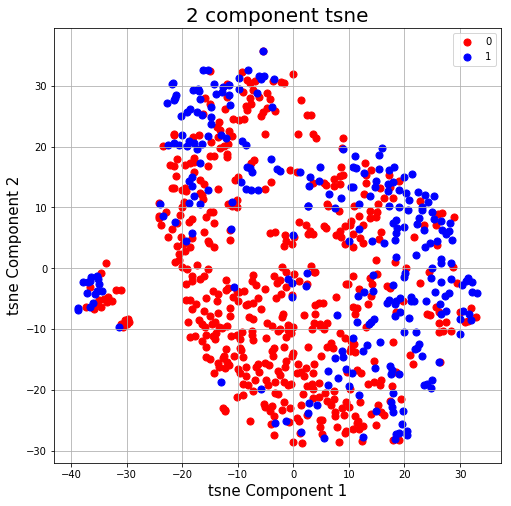

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15)
ax.set_ylabel('tsne Component 2', fontsize = 15)
ax.set_title('2 component tsne', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df['target'] == target
    ax.scatter(tsne_df.loc[indicesToKeep, 'tsne_1']
               , tsne_df.loc[indicesToKeep, 'tsne_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## XGBoost for feature selection and classification

In [17]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score

In [18]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42,use_label_encoder=False,eval_metric=['auc'])

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.82746
[1]	validation_0-auc:0.82443
[2]	validation_0-auc:0.82691
[3]	validation_0-auc:0.83297
[4]	validation_0-auc:0.81625
[5]	validation_0-auc:0.82231
[6]	validation_0-auc:0.81827
[7]	validation_0-auc:0.81662


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eval_metric=['auc'],
       gamma=0, gpu_id=-1, importance_type='gain',
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=8,
       num_parallel_tree=1, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
       tree_method='exact', use_label_encoder=False, validate_parameters=1,
       verbosity=None)

In [19]:
print('best AUC score: {} at iteration {} with ntree {}'.format(xgb_model.best_score,xgb_model.best_iteration,xgb_model.best_ntree_limit))

xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print('The XGBoost model achieves acc of {:.3f}, and auc of {:.3f}.'.format(xgb_acc,xgb_model.best_score))

best AUC score: 0.832966 at iteration 3 with ntree 4
The XGBoost model achieves acc of 0.753, and auc of 0.833.


In [20]:
print('The importances of each feature that contributes to the xgb classification: \n{}'.format(xgb_model.feature_importances_))

The importances of each feature that contributes to the xgb classification: 
[0.05473172 0.34860444 0.08301385 0.07438435 0.07860086 0.15627448
 0.06708726 0.13730296]


## Neural Network

In [21]:
model = md.create_diabetes_model(X_df.shape[1])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.AUC()])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input-layer (InputLayer)     [(None, 8)]               0         
_________________________________________________________________
hidden-1 (Dense)             (None, 16)                144       
_________________________________________________________________
hidden-2 (Dense)             (None, 8)                 136       
_________________________________________________________________
output-layer (Dense)         (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.2, verbose=0)

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])


In [24]:
res_nn = model.evaluate(X_test, y_test)
print('The neural network model achieves acc of {:.3f}, and auc of {:.3f}.'.format(res_nn[1],res_nn[2]))

5/5 [==============================] - 0s 1ms/step - loss: 0.5699 - accuracy: 0.7662 - auc: 0.7881
The neural network model achieves acc of 0.766, and auc of 0.788.


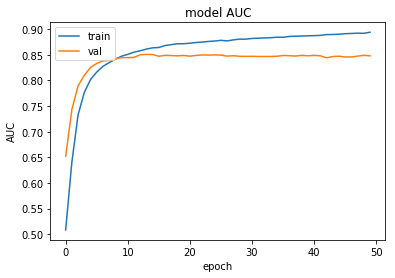

In [25]:
# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

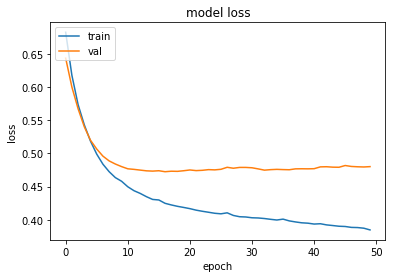

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Conclusion

## Data visualization
In the PCA figure, the positive class has a slight difference on average along the component 1 axis. However, the shift is not significant to split the data into two groups.

In the t-SNE figure, there are 2 major clusters with both group of data, and the data samples in the same cluster have similar feature values. This could be caused by additional features, such as gender, race, which is not included in the dataset. Inside each cluster, the data belonging to one group do not completely overlap with the other group of data, which indicates that the data is separatable by further analysis.

## Feature selection
According to both the correlation and importance value, we can see that the 2nd, 6th and 8th features  are the top 3 features contribute the most to the diabetes classification.
- 2nd feature: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- 6th feature: Body mass index (weight in kg/(height in m)^2)
- 8th feature: Age (years)

In [27]:
print('The correlation coefficient between the features and class index: \n{}'.format(corr[0:-1,-1]))
print('The importances of each feature that contributes to the xgb classification: \n{}'.format(xgb_model.feature_importances_))

The correlation coefficient between the features and class index: 
[0.22189815 0.4665814  0.06506836 0.07475223 0.13054795 0.29269466
 0.17384407 0.23835598]
The importances of each feature that contributes to the xgb classification: 
[0.05473172 0.34860444 0.08301385 0.07438435 0.07860086 0.15627448
 0.06708726 0.13730296]


## Classification
The XGBoost model outperforms the neural network model in terms of auc. Because the number of positve patients is much less than negative samples, the auc metric is more important for this evaluation. 

In [28]:
print('The XGBoost model achieves acc of {:.3f}, and auc of {:.3f}.'.format(xgb_acc,xgb_model.best_score))
print('The neural network model achieves acc of {:.3f}, and auc of {:.3f}.'.format(res_nn[1],res_nn[2]))

The XGBoost model achieves acc of 0.753, and auc of 0.833.
The neural network model achieves acc of 0.766, and auc of 0.788.
